<h2>Lagos House Prices Prediction (For Rent) </h2>
<h3>Description </h3>
<p>The gets the prices of house rent base on the following attributes: House Types, Location and Number of Bedrooms. </p>
<p>The data used have been gotten fes of house prices accross different rom scraping a real estate website to retrieve over 1000 instances of house prices across different locations in Lagos State. This was possible with the use of Python and BeautifulSoup </p>

In [332]:
# importing required libraries

import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [333]:
# importing target URL

property = pd.read_csv('house_property.csv')

In [334]:
property.head()

,Unnamed: 0,House Details,Location,Price (N),Bedroom
0,0,DETACHED DUPLEX,Lekki,"9,000,000",6
1,1,FLAT,Yaba,"1,100,000",3
2,2,FLAT,Ikeja,"1,800,000",2
3,3,DETACHED DUPLEX,Lekki,"9,000,000",6
4,4,FLAT,Ojodu,"2,200,000",3


In [335]:
#checking the unique values of "bedroom'

property['Bedroom'].unique()

array(['6', '3', '2', '4', 'OFFICE', 'SEMI', '5', '1', 'FLAT', 'TERRACED',
       'WAREHOUSE', 'COMMERCIAL', 'MIXED', '7', 'LAND', 'SELF',
       'DETACHED', 'SHOP', '10', 'BLOCKS', 'HOUSE', '8', 'SHOW',
       'HOTEL/GUEST', '9', 'MINI', 'CONFERENCE', 'SHARED', 'BOYS',
       'RESIDENTIAL', 'PRIVATE'], dtype=object)

In [336]:
#creating a function that converts all non numerical values to NaN values

def bed(x):
    
    if '1' in x:
        return '1'
    
    elif '2' in x:
        return '2'
    
    elif '3' in x:
        return '3'
    
    elif '4' in x:
        return '4'
    
    elif '5' in x:
        return '5'
    
    elif '6' in x:
        return '6'
    
    elif '7' in x:
        return '7'
    
    elif '8' in x:
        return '8'
    
    elif '9' in x:
        return '9'
    
    elif '10' in x:
        return '10'
    
    else:
        return 'NaN'
    
   

In [337]:
#creating a new attribute that contains all bedroom instances to be numerical and NaN

property["Bedrooms"] = property["Bedroom"].apply(bed)

property.head()

,Unnamed: 0,House Details,Location,Price (N),Bedroom,Bedrooms
0,0,DETACHED DUPLEX,Lekki,"9,000,000",6,6
1,1,FLAT,Yaba,"1,100,000",3,3
2,2,FLAT,Ikeja,"1,800,000",2,2
3,3,DETACHED DUPLEX,Lekki,"9,000,000",6,6
4,4,FLAT,Ojodu,"2,200,000",3,3


In [338]:
#confirming the new attribute('Bedroom No.') is rightly created

property['Bedrooms'].unique()

array(['6', '3', '2', '4', 'NaN', '5', '1', '7', '8', '9'], dtype=object)

In [339]:
property = property[property['Bedrooms'].str.contains('1') | property['Bedrooms'].str.contains('2') |property['Bedrooms'].str.contains('3') | property['Bedrooms'].str.contains('4') | property['Bedrooms'].str.contains('5') | property['Bedrooms'].str.contains('6') | property['Bedrooms'].str.contains('7') | property['Bedrooms'].str.contains('8') | property['Bedrooms'].str.contains('9')].reset_index().drop(columns='index')

In [340]:
#editing the attribute name of "Price"

property['Price'] = property['Price (N)']

In [341]:
#editing the attribute name of "house details"

property['Types'] = property['House Details']

In [342]:
#Dropping the unwanted variables

property.drop(['Unnamed: 0', 'Bedroom','Price (N)'], axis=1, inplace=True)

In [343]:
#checking the value counts of differnt locations in Lagos 

property['Location'].value_counts()

Lekki       615
Ikoyi       528
Island      211
Ajah        102
Ikeja        71
Yaba         54
Surulere     46
Gbagada      45
Isolo        40
Maryland     28
Ojodu        26
Odofin       24
Ipaja        19
Okota        19
Ikosi        17
Shomolu      17
Ogudu        14
Ikorodu      14
Ogba         10
Egba          8
Wuye          7
Camp          6
Alimosho      5
Ilupeju       5
Igando        3
Oshodi        3
Ejigbo        2
Ketu          2
Iju           1
Agege         1
Name: Location, dtype: int64

Our machine learning model will be designed to focus on locations that have 15 or more instances of appearance in the dataset.

In [344]:
property_filter = property[property['Location'].str.contains('Lekki') | property['Location'].str.contains('Ikoyi') | property['Location'].str.contains('Island') | property['Location'].str.contains('Ajah') | property['Location'].str.contains('Ikeja') | property['Location'].str.contains('Yaba') | property['Location'].str.contains('Isolo') | property['Location'].str.contains('Surulere') | property['Location'].str.contains('Gbagada')| property['Location'].str.contains('Maryland')| property['Location'].str.contains('Ojodu')| property['Location'].str.contains('Shomolu')| property['Location'].str.contains('Odofin')| property['Location'].str.contains('Okota')| property['Location'].str.contains('Ipaja')].reset_index().drop(columns='index')

In [345]:
#confirming the filtered dataset with new sum of instances

property_filter['Location'].value_counts()

Lekki       615
Ikoyi       528
Island      211
Ajah        102
Ikeja        71
Yaba         54
Surulere     46
Gbagada      45
Isolo        40
Maryland     28
Ojodu        26
Odofin       24
Ipaja        19
Okota        19
Shomolu      17
Name: Location, dtype: int64

In [346]:
#checking the value counts of the house types for rent

property['Types'].value_counts()

FLAT                   812
TERRACED DUPLEX        248
MINI FLAT              237
DETACHED DUPLEX        228
SEMI DETACHED          152
HOUSE FOR               73
BLOCKS OF               71
PENTHOUSE FLAT          42
MASSIONETTE HOUSE       20
OFFICE SPACE            15
SHARED APARTMENT        10
SELF CONTAIN             9
DETACHED BUNGALOW        8
BOYS QUARTERS            7
COMMERCIAL PROPERTY      5
STUDIO APARTMENT         2
HOTELGUEST HOUSE         2
SHOP IN                  1
TERRACED BUNGALOW        1
Name: Types, dtype: int64

House types that has instances of 20 and above will be retained for our modelling while others will be dropped from the data set

In [347]:
property_filter = property_filter[property_filter['Types'].str.contains('FLAT') | property_filter['Types'].str.contains('TERRACED DUPLEX') | property_filter['Types'].str.contains('MINI FLAT') | property_filter['Types'].str.contains('DETACHED DUPLEX') | property_filter['Types'].str.contains('SEMI DETACHED') | property_filter['Types'].str.contains('COMMERCIAL PROPERTY') | property_filter['Types'].str.contains('PAINTHOUSE FLAT') | property_filter['Types'].str.contains('MASSIONETTE HOUSE') | property_filter['Types'].str.contains('OFFICE SPACE') | property_filter['Types'].str.contains('SHARED APARTMENT') | property_filter['Types'].str.contains('SELF CONTAIN')].reset_index().drop(columns='index')

In [348]:
property_filter['Types'].value_counts()

FLAT                   771
TERRACED DUPLEX        242
DETACHED DUPLEX        225
MINI FLAT              222
SEMI DETACHED          147
PENTHOUSE FLAT          42
MASSIONETTE HOUSE       20
OFFICE SPACE            15
SHARED APARTMENT        10
SELF CONTAIN             9
COMMERCIAL PROPERTY      5
Name: Types, dtype: int64

In [349]:
#checking the data types of each of the attributes

property_filter.dtypes

House Details    object
Location         object
Bedrooms         object
Price            object
Types            object
dtype: object

In [350]:
#getting more details about the dataset

property_filter.describe()

,House Details,Location,Bedrooms,Price,Types
count,1708,1708,1708,1708,1708
unique,11,15,9,131,11
top,FLAT,Lekki,3,"9,000,000",FLAT
freq,771,576,561,147,771


In [351]:
#converting the string value to integer value in the "price" attribute

property_filter['Price']= property.Price.str.replace(',' , '').astype(int)

In [352]:
property_filter.head()

,House Details,Location,Bedrooms,Price,Types
0,DETACHED DUPLEX,Lekki,6,9000000,DETACHED DUPLEX
1,FLAT,Yaba,3,1100000,FLAT
2,FLAT,Ikeja,2,1800000,FLAT
3,DETACHED DUPLEX,Lekki,6,9000000,DETACHED DUPLEX
4,FLAT,Ojodu,3,2200000,FLAT


In [353]:
property_filter.dtypes

House Details    object
Location         object
Bedrooms         object
Price             int32
Types            object
dtype: object

In [354]:
property_filter.dtypes

House Details    object
Location         object
Bedrooms         object
Price             int32
Types            object
dtype: object

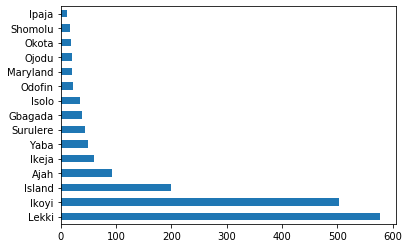

In [355]:
property_filter['Location'].value_counts().plot(kind='barh')

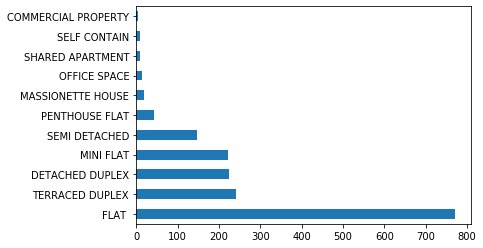

In [356]:
property_filter['House Details'].value_counts().plot(kind='barh')

In [357]:
property_filter.dtypes

House Details    object
Location         object
Bedrooms         object
Price             int32
Types            object
dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

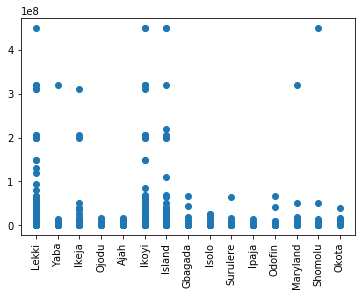

In [358]:
plt.scatter('Location', 'Price', data=property_filter)
plt.xticks(rotation=90)

In [359]:
property_filter.dtypes

House Details    object
Location         object
Bedrooms         object
Price             int32
Types            object
dtype: object

In [360]:
#converting the Location attribute to figures that will allow for modelling

add = property_filter['Location'].unique()

for i,Location in enumerate(add):

    property_filter.replace(Location,i,inplace=True)

In [361]:
#converting the bedroom number attribute to figures that will allow for modelling

add = property_filter['Bedrooms'].unique()

for i,Bedrooms in enumerate(add):
    
    property_filter.replace(Bedrooms,i,inplace=True)

In [362]:
#converting the types of house attribute to figures that will allow for modelling

add = property_filter['Types'].unique()

for i,Types in enumerate(add):
    
    property_filter.replace(Types,i,inplace=True)

In [363]:
property_filter.corr(method="pearson")

,House Details,Location,Bedrooms,Price,Types
House Details,1.000000,-0.004187,0.580389,-0.036252,1.000000
Location,-0.004187,1.000000,-0.029631,0.014274,-0.004187
Bedrooms,0.580389,-0.029631,1.000000,-0.000263,0.580389
Price,-0.036252,0.014274,-0.000263,1.000000,-0.036252
Types,1.000000,-0.004187,0.580389,-0.036252,1.000000


In [364]:
#setting "price" to be the target variable and setting to y

y = property_filter['Price']

In [365]:
#setting the relavant variables to x

x = property_filter.drop(['Price'], axis=1)

In [366]:
y.shape

(1708,)

In [367]:
x.shape

(1708, 4)

In [368]:
#converting the x variable to numpy

x = x.to_numpy()

In [369]:
#converting the y variable to numpy

y = y.to_numpy()

In [370]:
#calling linear regression for application

reg = LinearRegression()

In [371]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [372]:
#splitting the dataset into 2 for training and for testing purpose

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [373]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1281, 4)
(427, 4)
(1281,)
(427,)


In [374]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [375]:
print(reg.intercept_)

10886977.609020676


In [376]:
print(reg.coef_)

[-665045.14912009  749359.96710565 1373945.28542552 -665045.14912009]


In [377]:
reg.score(x_test,y_test)

-0.018670754358966812

In [380]:
reg.score(x_test,y_test)

-0.018670754358966812